```Python
"""Demo DWT and IDWT of batched, multichannel tensors

TFDWT: Fast Discrete Wavelet Transform TensorFlow Layers.
Copyright (C) 2025 Kishore Kumar Tarafdar

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""
```

***This Notebook has additional dependencies***:

1. opencv-python
```bash
pip install opencv-python
```

2. matplotlib: 
```bash
pip install matplotlib
```

In [1]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [2]:
!python --version

Python 3.12.9


GPU availability?

In [3]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

2025-04-02 16:44:59.174110: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 16:44:59.183158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743592499.194019 1037132 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743592499.197246 1037132 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743592499.205412 1037132 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version 2.19.0
CUDA Version: 12.5.1
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [4]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [5]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


I0000 00:00:1743592500.541992 1037132 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
import TFDWT
TFDWT.__version__

'0.0.2'

        utils

In [7]:
def percenterror(x,xhat):
    """Compute percentage error"""
    true = tf.reduce_sum(tf.square(x)).numpy() 
    predict = tf.reduce_sum(tf.square(xhat)).numpy()
    e = (true - predict) / true
    ep = e*100
    # print(f"Percentage error is {e} %")
    print(f"Percentage error is {ep:.3f} % (upto 3 decimal places)")
    return ep

## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [8]:
from TFDWT.DWTIDWT1Dv1 import DWT1D, IDWT1D

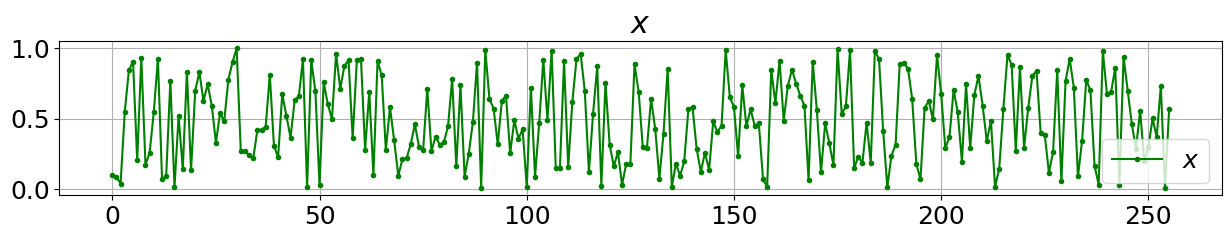

Raw x shape (256,)


In [9]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [10]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 6.79507852e-01 -2.61229873e-01]
  [-9.68630910e-02 -1.03066757e-01]
  [ 1.14190674e+00  3.92290950e-03]
  [ 5.50053060e-01 -3.86913747e-01]
  [ 1.00826049e+00 -4.11225379e-01]
  [ 4.63326395e-01  1.99827552e-02]
  [ 8.30269814e-01 -3.73318076e-01]
  [ 8.84942770e-01  3.67017567e-01]
  [ 2.43660450e-01  3.79488528e-01]
  [ 8.01500320e-01  4.33868438e-01]
  [ 2.94764340e-01  2.99632430e-01]
  [ 1.03482676e+00 -1.16326541e-01]
  [ 1.08107305e+00 -2.81611681e-02]
  [ 5.44389427e-01  1.32049084e-01]
  [ 8.24225008e-01  9.37524140e-02]
  [ 1.64564753e+00  1.41667664e-01]
  [ 1.32008970e-01  1.31732017e-01]
  [ 2.45896012e-01 -4.00343388e-02]
  [ 6.58727169e-01 -3.79449129e-02]
  [ 1.07186913e+00  2.15715051e-01]
  [ 4.10870463e-02 -1.99422240e-02]
  [ 1.05659485e+00 -1.07606381e-01]
  [ 6.40721917e-01  1.15476549e-01]
  [ 1.44865417e+00  2.47534186e-01]
  [ 4.12728369e-01  5.17269731e-01]
  [ 1.75315440e-01 -3.27055693e-01]
  [ 1.2

I0000 00:00:1743592500.860643 1037132 cuda_executor.cc:479] failed to allocate 8.00GiB (8589934592 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.10260381]
  [0.08571184]
  [0.03978734]
  [0.54786384]
  [0.84377956]
  [0.9053431 ]
  [0.20495276]
  [0.93132305]
  [0.17338079]
  [0.25736785]
  [0.54567105]
  [0.9252509 ]
  [0.07103039]
  [0.09481533]
  [0.76749665]
  [0.01290968]
  [0.5200197 ]
  [0.14211568]
  [0.83141804]
  [0.13359646]
  [0.69819146]
  [0.8302262 ]
  [0.62648183]
  [0.7450006 ]
  [0.59300506]
  [0.32979888]
  [0.5413226 ]
  [0.48059362]
  [0.7773758 ]
  [0.90132535]
  [0.99975944]
  [0.27128464]
  [0.2673542 ]
  [0.24277928]
  [0.21780638]
  [0.4189039 ]
  [0.42231086]
  [0.44267613]
  [0.81155866]
  [0.3086899 ]
  [0.22546372]
  [0.6746904 ]
  [0.5186478 ]
  [0.36604947]
  [0.6308472 ]
  [0.659807  ]
  [0.92089283]
  [0.01383972]
  [0.914153  ]
  [0.69571316]
  [0.02706304]
  [0.75830877]
  [0.6015486 ]
  [0.49918437]
  [0.95903295]
  [0.71263254]
  [0.87451226]
  [0.91480476]
  [0.36085075]
  [0.9134833 ]
  [0.9208544 ]
  [0.28087443]
  [0.6906585 ]
  [0.10

([<matplotlib.lines.Line2D at 0x7f35dc365c70>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

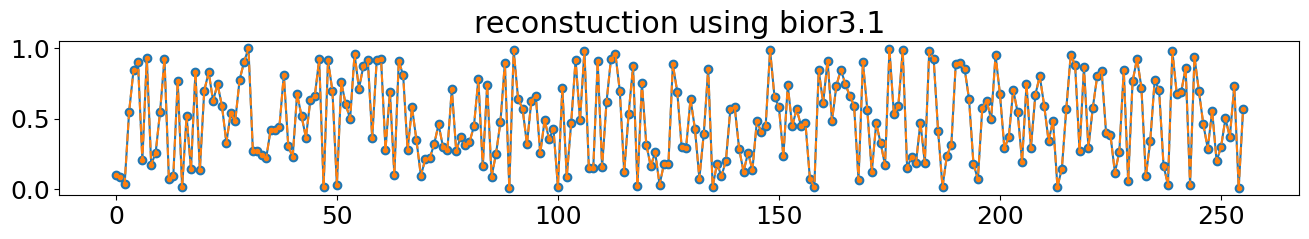

In [11]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

In [12]:
x.shape, idwtout.shape

((256,), TensorShape([1, 256, 1]))

        Reconstruction error

In [13]:
# tf.reduce_sum(tf.square(x)).numpy() - tf.reduce_sum(tf.square(idwtout)).numpy()
percenterror(x,idwtout)

Percentage error is 0.000 % (upto 3 decimal places)


np.float64(1.866469734072676e-05)

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [14]:
from TFDWT.DWTIDWT2Dv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

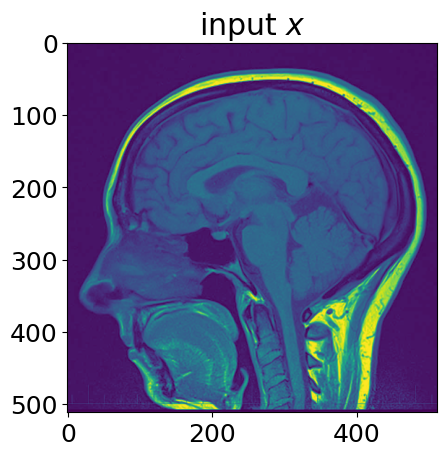

In [15]:
import cv2
x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


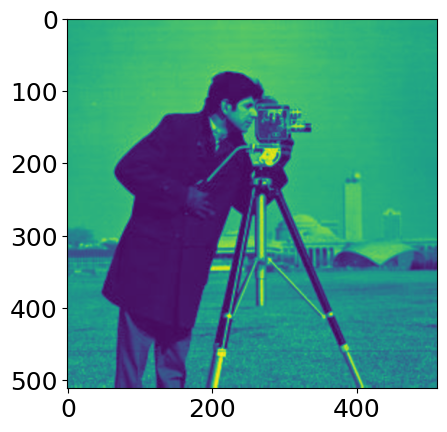

In [16]:
x1 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


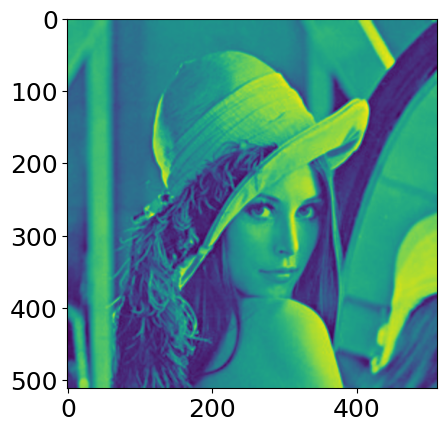

In [17]:
x2 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [18]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [19]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


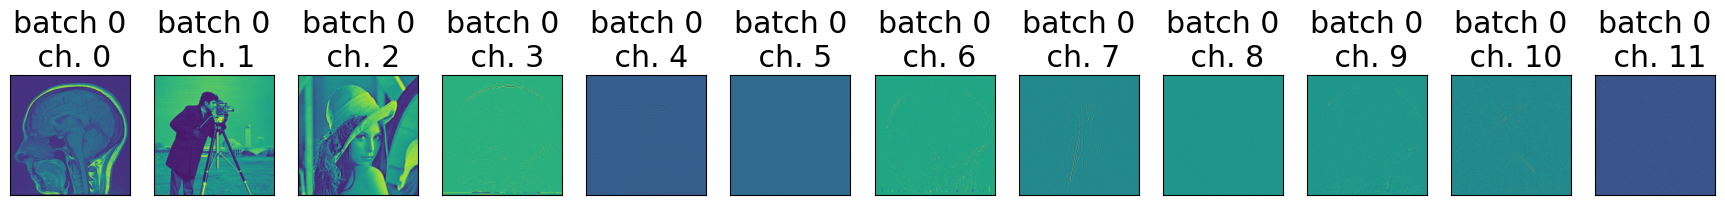

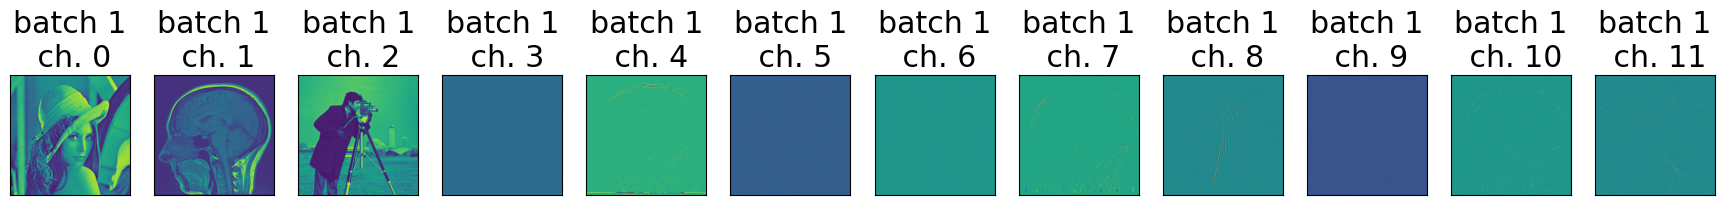

In [20]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt

def plotall(_, thresh=0):
    # _ = coeffs
    for b in range(_.shape[0]):
        plt.figure(figsize=(22,8))
        for c in range(_.shape[-1]):
            plt.subplot(1, _.shape[-1], c+1), 
            if thresh==0:
                plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
            else:
                plt.imshow(_[b,:,:,c]>thresh), plt.title(f'batch {b}\n ch. {c}')
            plt.xticks([])
            plt.yticks([])
        plt.show()
plotall(coeffs, 0)    

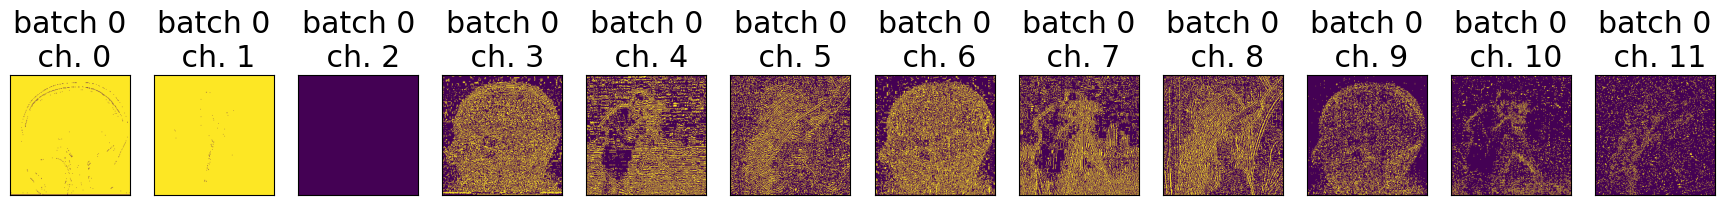

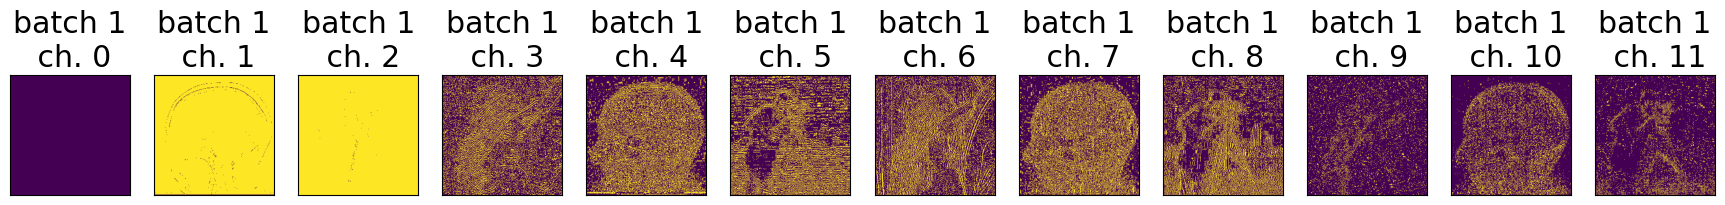

In [21]:
plotall(coeffs, 0.001) 

In [22]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


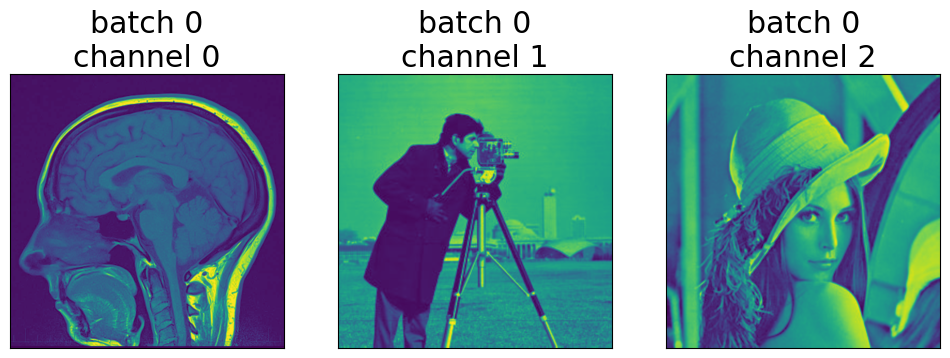

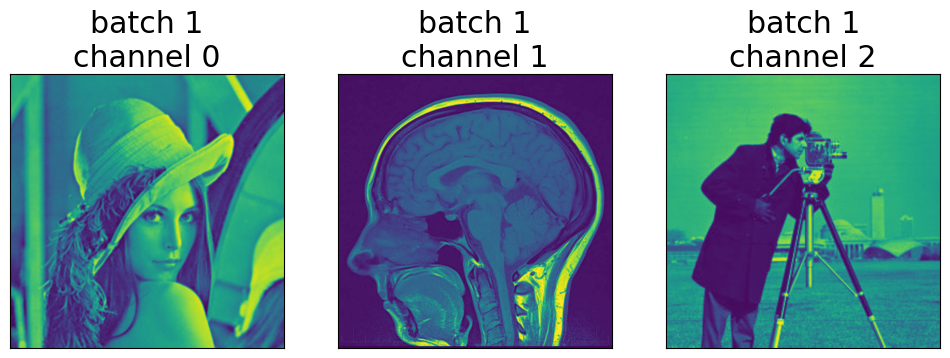

In [23]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [24]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.6875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332183.4375>)

        reconstruction error

In [25]:
# tf.reduce_sum(tf.square(xnew)) - tf.reduce_sum(tf.square(out))
percenterror(xnew,out)

Percentage error is 0.084 % (upto 3 decimal places)


np.float32(0.083693855)

In [26]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

## 3D: DWT, IDWT \& Perfect Reconstruction


In [27]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src/TFDWT.pypi/TFDWT'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from DWTIDWT3Dv1 import DWT3D, IDWT3D

In [28]:
# from TFDWT.DWTIDWT3Dv1 import DWT3D, IDWT3D

In [29]:
# x3d = tf.random.uniform((2, 16, 16, 16, 3))
x3d = tf.random.uniform((2, 256, 256, 256, 3))

In [30]:
LLLLLHLHLLHHHLLHLHHHLHHH = DWT3D(wave=wave)(x3d)      # Analysis
x_hat = IDWT3D(wave=wave)(LLLLLHLHLLHHHLLHLHHHLHHH) # Synthesis

Biothogonal wavelet bior3.1


In [31]:
x_hat.shape, LLLLLHLHLLHHHLLHLHHHLHHH.shape

(TensorShape([2, 256, 256, 256, 3]), TensorShape([2, 128, 128, 128, 24]))

In [32]:
x3d.shape, x_hat.shape, tf.reduce_sum(tf.square(x3d)), tf.reduce_sum(tf.square(x_hat))

(TensorShape([2, 256, 256, 256, 3]),
 TensorShape([2, 256, 256, 256, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=33550858.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=34411712.0>)

In [33]:
percenterror(x3d,x_hat)  

Percentage error is -2.566 % (upto 3 decimal places)


np.float32(-2.565818)

---

Rough

raw x shape: (814, 800)
x shape: (256, 256)
3D input x shape is (256, 256, 256)
3D shape (1, 256, 256, 256, 1)
3D shape update (1, 256, 256, 256, 2)
DWT3D coeffs shape (1, 128, 128, 128, 16)


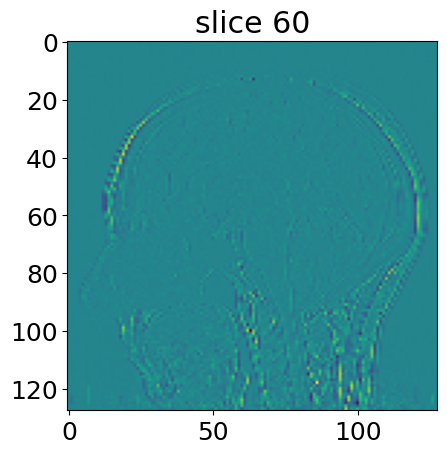

Reconstruction shape (1, 256, 256, 256, 2)
Percentage error is 0.121 % (upto 3 decimal places)


np.float32(0.12088673)

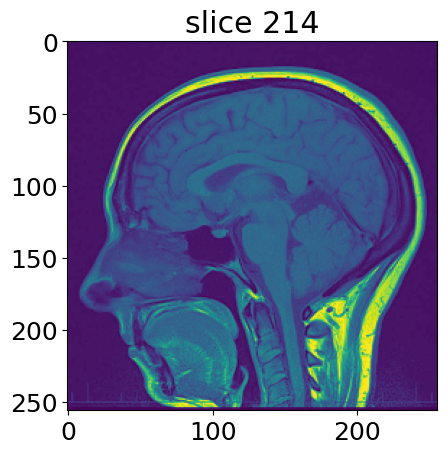

In [ ]:

# # if __name__=='__main__':
# import numpy as np
# import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = '18'
# # from scipy import ndimage
# #from sympy import Matrix


# """
# x = np.random.rand(input_shape[0],input_shape[1])
# plt.figure(figsize=(15,2))
# plt.imshow(x, label='$x$')
# plt.title('$x$')
# """
# import pywt.data
# # Load image
# x1 = pywt.data.camera()

# import cv2
# x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
# print('raw x shape:', x.shape)
# # x = cv2.resize(x, (512,512))
# x = cv2.resize(x, (256,256))

# print('x shape:', x.shape)
# #x = x/np.max(x)
# plt.imshow(x,label='$x$')
# plt.title('input $x$')

# x_bak = x

# # global N
# N = x.shape[0]
# input_shape = (N,N,1)


# import tensorflow as tf
# import matplotlib
# # import scipy
# import pywt

# x3d = np.concatenate([np.expand_dims(x, axis=-1) for i in range(x.shape[0])], axis=-1)
# print(f'3D input x shape is {x3d.shape}')
# _x3d = tf.cast(x3d, dtype=tf.float32)
# _x3dnew = tf.expand_dims(tf.expand_dims(_x3d, axis=-1), axis=0)
# print('3D shape', _x3dnew.shape)

# # signal 2 with multiple channels
# _x3dnew = tf.concat([_x3dnew,_x3dnew], axis=-1)
# print('3D shape update', _x3dnew.shape)

# coeffs = DWT3D(wave='db2')(_x3dnew)
# print('DWT3D coeffs shape', coeffs.shape)
# i = np.random.randint(128)
# plt.imshow(coeffs[0,:,:,i,4]), plt.title(f"slice {i}")
# plt.show()

# _r3d = IDWT3D(wave='db2')(coeffs)
# print('Reconstruction shape',_r3d.shape)

# i = np.random.randint(256)
# plt.imshow(_r3d[0,:,:,i,0]), plt.title(f"slice {i}")

# # def percenterror(x,xhat):
# #     """Compute percentage error"""
# #     true = tf.reduce_sum(tf.square(x)).numpy() 
# #     predict = tf.reduce_sum(tf.square(xhat)).numpy()
# #     e = (true - predict) / true
# #     ep = e*100
# #     # print(f"Percentage error is {e} %")
# #     print(f"Percentage error is {ep:.3f} % (upto 3 decimal places)")
# #     return ep
    
# percenterror(_x3dnew, _r3d)